In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
df=pd.read_csv('/content/csgo_round_snapshots.csv')

In [56]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [58]:
df['map'].value_counts()

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

In [59]:
df['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

In [60]:
counts=df['map'].value_counts()

total=counts.sum()

perc=counts/total*100

perc

de_inferno     19.451842
de_dust2       18.090025
de_nuke        15.542031
de_mirage      15.175231
de_overpass    11.503145
de_train       11.021158
de_vertigo      9.098113
de_cache        0.118454
Name: map, dtype: float64

In [61]:
counts.index

Index(['de_inferno', 'de_dust2', 'de_nuke', 'de_mirage', 'de_overpass',
       'de_train', 'de_vertigo', 'de_cache'],
      dtype='object')

In [62]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [63]:
counts.values

array([23811, 22144, 19025, 18576, 14081, 13491, 11137,   145])

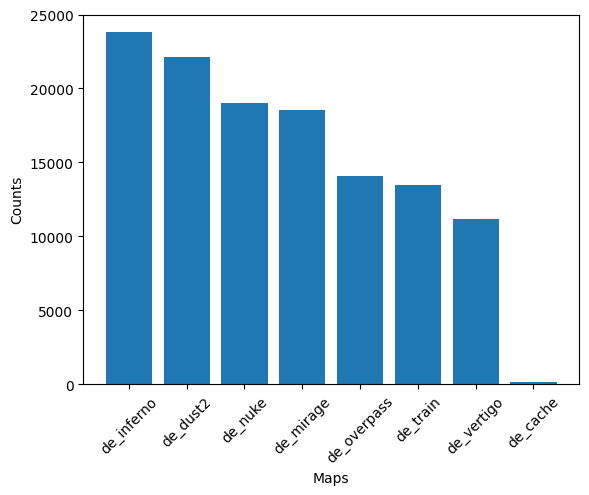

In [64]:
plt.bar(counts.index,counts.values)
plt.xlabel('Maps')
plt.ylabel('Counts')
plt.xticks(rotation=45)

plt.show()

In [65]:
df['bomb_planted'].value_counts()

False    108726
True      13684
Name: bomb_planted, dtype: int64

## Feature Engineering

In [66]:
le=LabelEncoder()

df['map']=le.fit_transform(df['map'])
df['bomb_planted']=le.fit_transform(df['bomb_planted'])
df['round_winner']=le.fit_transform(df['round_winner'])

In [67]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [68]:
X=df.drop(columns=['round_winner'])
Y=df['round_winner']

In [69]:
X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [70]:
Y.shape

(122410,)

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [72]:
## Scale

sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [73]:
xtest

array([[-1.15452832, -0.35674364,  0.46192413, ..., -0.81251824,
        -0.16462816, -0.15779608],
       [-0.56955217, -0.98372497, -0.16026899, ...,  1.59150273,
        -0.16462816, -0.15779608],
       [ 1.41400874, -0.98372497, -1.40465522, ..., -0.81251824,
        -0.16462816, -0.15779608],
       ...,
       [ 1.41474271, -0.77473119, -0.7824621 , ..., -0.81251824,
        -0.16462816, -0.15779608],
       [-0.42018875,  0.89721903, -0.16026899, ...,  0.99049749,
        -0.16462816, -0.15779608],
       [-1.52096413,  1.1062128 ,  0.04712872, ..., -0.81251824,
        -0.16462816, -0.15779608]])

## LDA

In [74]:
lda=LinearDiscriminantAnalysis()

lda.fit(xtrain,ytrain)

LinearDiscriminantAnalysis()

In [75]:
lda.coef_

array([[ 1.30585532e-01, -2.83144788e-02,  1.83299271e-02,
        -8.19181907e-02,  2.39339440e-01, -4.41275582e-01,
         3.14967585e-01, -5.55567362e-01,  5.51110345e-01,
        -2.01582904e-01,  1.54480934e-01,  2.66336202e-02,
         1.12995561e-01, -2.13170125e-02, -1.95953308e-01,
         2.80372333e-01, -1.90972533e-01,  6.05122528e-01,
        -2.12053365e-01,  3.51274000e-02, -3.08025132e-01,
         2.49384549e-01, -2.45543796e-16, -4.73190850e-03,
         1.25316551e-02,  3.57428414e-02, -8.98851543e-03,
         1.52919428e-02, -1.41788441e-01,  4.76768287e-02,
         8.41345747e-17,  2.11301668e-02, -5.26987756e-02,
         1.31417341e-01,  2.41234695e-02, -1.76269810e-02,
         1.08322859e-02, -3.53533322e-16, -1.00261626e-01,
         4.83559460e-02, -4.70779119e-01,  1.03636631e-01,
        -1.38225853e-02,  1.11727549e-01, -1.89628870e-02,
         6.59304837e-03, -1.02831774e-02,  3.24664520e-02,
         1.84591481e-03, -6.74655351e-03, -1.09776494e-0

In [76]:
lda_coef=np.exp(np.abs(lda.coef_))

In [77]:
lda_coef=lda_coef.flatten()

In [78]:
lda_coef

array([1.1394954 , 1.02871914, 1.01849895, 1.08536701, 1.27040969,
       1.55468909, 1.37021489, 1.74292958, 1.7351786 , 1.22333765,
       1.16705203, 1.02699146, 1.11962696, 1.02154584, 1.2164701 ,
       1.32362255, 1.2104262 , 1.8314766 , 1.23621385, 1.03575166,
       1.36073519, 1.28323541, 1.        , 1.00474312, 1.01261051,
       1.0363893 , 1.00902903, 1.01540946, 1.15233284, 1.04883165,
       1.        , 1.02135499, 1.05411207, 1.14044364, 1.02441679,
       1.01778325, 1.01089117, 1.        , 1.1054601 , 1.04954417,
       1.60124126, 1.10919733, 1.01391856, 1.11820816, 1.01914382,
       1.00661483, 1.01033623, 1.03299924, 1.00184762, 1.00676936,
       1.1160286 , 1.03900717, 1.        , 1.00755766, 1.02065544,
       1.00806494, 1.02526161, 1.01402512, 1.        , 1.00231207,
       1.        , 1.00969399, 1.00572534, 1.0119734 , 1.24320053,
       1.74572263, 1.0840291 , 1.0307134 , 1.05268993, 1.09287345,
       1.02252465, 1.00057277, 1.02232614, 1.06140182, 1.03621

In [79]:
ar=np.array([[[12,23,2,32]]])

In [80]:
ar.shape

(1, 1, 4)

In [81]:
ar=ar.flatten()

In [82]:
ar.shape

(4,)

In [83]:
ar

array([12, 23,  2, 32])

In [84]:
numfeatures=len(lda_coef)

In [85]:
feature_in=np.arange(numfeatures)
feature_in

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [86]:
feature_nm=list(X.columns)

In [87]:
type(feature_nm)

list

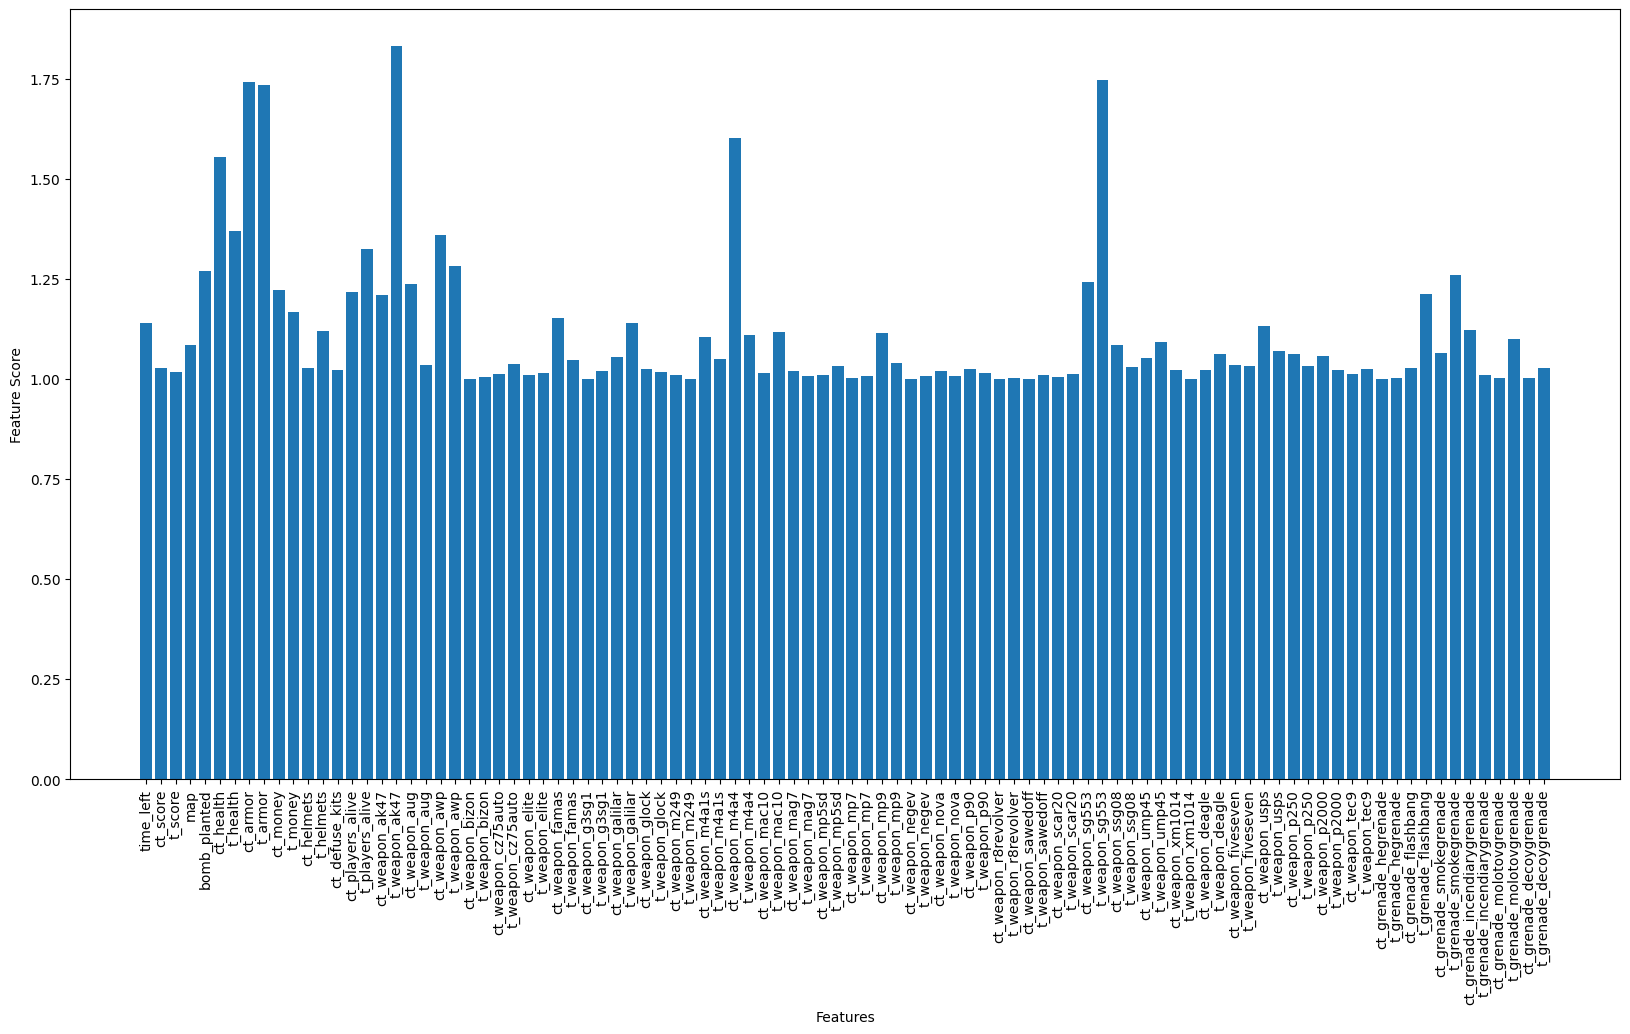

In [88]:
plt.figure(figsize=(20,10))
plt.bar(feature_in,lda_coef)
plt.xticks(feature_in,feature_nm,rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Score')
plt.show()

In [89]:
df_feature_score=pd.DataFrame({'Feature_names':feature_nm,'feature_scores':lda_coef})

In [90]:
df_feature_score

,Feature_names,feature_scores
0,time_left,1.139495
1,ct_score,1.028719
2,t_score,1.018499
3,map,1.085367
4,bomb_planted,1.270410
...,...,...
91,t_grenade_incendiarygrenade,1.010352
92,ct_grenade_molotovgrenade,1.002721
93,t_grenade_molotovgrenade,1.100881
94,ct_grenade_decoygrenade,1.002945


In [91]:
top_20_features=df_feature_score.nlargest(20,"feature_scores")

In [92]:
top_20_features

,Feature_names,feature_scores
17,t_weapon_ak47,1.831477
65,t_weapon_sg553,1.745723
7,ct_armor,1.742930
8,t_armor,1.735179
40,ct_weapon_m4a4,1.601241
5,ct_health,1.554689
6,t_health,1.370215
20,ct_weapon_awp,1.360735
15,t_players_alive,1.323623
21,t_weapon_awp,1.283235


In [93]:
top20_ind=list(top_20_features.index)

In [94]:
type(top20_ind)

list

In [95]:
xtest

array([[-1.15452832, -0.35674364,  0.46192413, ..., -0.81251824,
        -0.16462816, -0.15779608],
       [-0.56955217, -0.98372497, -0.16026899, ...,  1.59150273,
        -0.16462816, -0.15779608],
       [ 1.41400874, -0.98372497, -1.40465522, ..., -0.81251824,
        -0.16462816, -0.15779608],
       ...,
       [ 1.41474271, -0.77473119, -0.7824621 , ..., -0.81251824,
        -0.16462816, -0.15779608],
       [-0.42018875,  0.89721903, -0.16026899, ...,  0.99049749,
        -0.16462816, -0.15779608],
       [-1.52096413,  1.1062128 ,  0.04712872, ..., -0.81251824,
        -0.16462816, -0.15779608]])

In [96]:
xtrain=xtrain[:,top20_ind]    # Extracting top 20 features from train

In [97]:
xtest=xtest[:,top20_ind]      # Extracting top 20 features from test

In [98]:
xtest

array([[-0.17894517, -0.72340621,  0.31388244, ...,  2.95066716,
        -0.87737897, -0.28407368],
       [-0.17894517,  1.03223115,  0.43657927, ..., -0.47079725,
         1.09683633, -0.28407368],
       [-0.91129816, -0.72340621, -0.10094968, ..., -0.47079725,
         0.45655029, -0.28407368],
       ...,
       [-0.17894517,  0.15441247, -0.66769215, ..., -0.47079725,
         0.81773728, -0.28407368],
       [ 1.28576081, -0.72340621, -0.80791709, ..., -0.47079725,
        -0.21657094, -0.28407368],
       [-0.17894517,  0.15441247,  0.42489385, ..., -0.47079725,
        -0.56954914,  2.27279833]])

In [99]:
xtrain

array([[ 1.28576081,  0.15441247, -1.25196274, ..., -0.47079725,
         1.42518814, -0.28407368],
       [-0.91129816, -0.72340621, -0.17690485, ...,  2.95066716,
         0.92855602, -0.28407368],
       [ 1.28576081, -0.72340621,  0.50084903, ..., -0.47079725,
        -0.33559847,  2.27279833],
       ...,
       [ 0.55340782, -0.72340621, -1.83623333, ..., -0.47079725,
         1.01885277, -0.28407368],
       [ 2.0181138 , -0.72340621, -0.34050062, ...,  2.95066716,
        -0.84043939, -0.28407368],
       [-0.17894517, -0.72340621, -1.83623333, ..., -0.47079725,
         0.73154493, -0.28407368]])

In [100]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)


LogisticRegression()

In [101]:
y_pred=lr.predict(xtest)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [104]:
accuracy_score(y_pred,ytest)

0.7480189526999428

In [105]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
y_pred=dtc.predict(xtest)
accuracy_score(y_pred,ytest)

0.8115758516461073

In [106]:
rd=RandomForestClassifier()
rd.fit(xtrain,ytrain)
y_pred=rd.predict(xtest)
accuracy_score(y_pred,ytest)

0.8594886038722327